In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 86s 1us/step


In [3]:
# Function to create CNN model
def create_model(pooling_type='max'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,
32, 3)))
    if pooling_type == 'max':
        model.add(MaxPooling2D((2, 2)))
    elif pooling_type == 'average':
        model.add(AveragePooling2D((2, 2)))
    else:
        raise ValueError("Invalid pooling type")
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])
    return model

In [4]:
# Create models with different pooling types
model_max_pooling = create_model('max')
model_average_pooling = create_model('average')

C:\Users\nr143\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train models
history_max = model_max_pooling.fit(x_train, y_train, epochs=10,
validation_data=(x_test, y_test))
history_average = model_average_pooling.fit(x_train, y_train, epochs=10,
validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 35ms/step - accuracy: 0.4731 - loss: 1.4733 - val_accuracy: 0.5633 - val_loss: 1.2424
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5888 - loss: 1.1737 - val_accuracy: 0.6017 - val_loss: 1.1445
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6319 - loss: 1.0483 - val_accuracy: 0.6127 - val_loss: 1.0914
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6620 - loss: 0.9638 - val_accuracy: 0.6345 - val_loss: 1.0538
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 23ms/step - accuracy: 0.6846 - loss: 0.8978 - val_accuracy: 0.6401 - val_loss: 1.0542
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7072 - loss: 0.8387 - val_accuracy: 0.6510 - val_loss: 1.0083
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7225 - loss: 0.7922 - val_accuracy: 0.6446 - val_loss: 1.0241
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7378 -

In [6]:
# Evaluate models
test_loss_max, test_acc_max = model_max_pooling.evaluate(x_test, y_test)
test_loss_average, test_acc_average = model_average_pooling.evaluate(x_test, y_test)
print("Max Pooling Test Accuracy:", test_acc_max)
print("Average Pooling Test Accuracy:", test_acc_average)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6387 - loss: 1.1401
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6323 - loss: 1.1259
Max Pooling Test Accuracy: 0.638700008392334
Average Pooling Test Accuracy: 0.6323000192642212


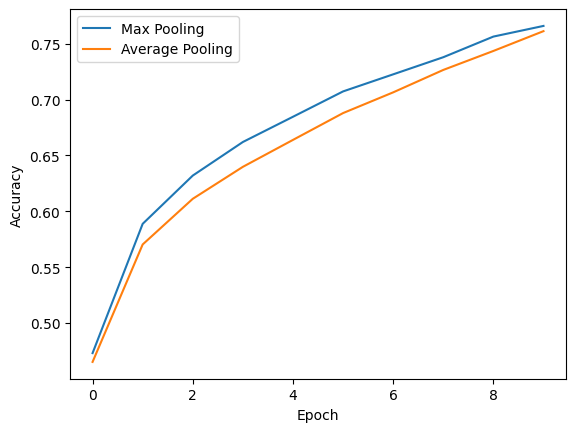

In [7]:
# Visualize training history
plt.plot(history_max.history['accuracy'], label='Max Pooling')
plt.plot(history_average.history['accuracy'], label='Average Pooling')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()